In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Vince\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
data = pd.read_csv('meta.csv')

In [181]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [223]:
x = np.random.randint(0, 100, 1000)
y = np.random.randint(0, 100, 1000)
z = np.random.randint(0, 100, 1000)

g = np.random.normal(loc=0, scale=75, size=1000)

classes = np.where((x + y + z + g > 150), 1, 0)

classes.sum()

497

In [224]:
df = pd.DataFrame([x, y, z, classes]).T
df.columns = 'x1 x2 x3 y'.split()

xtrain, xtest, ytrain, ytest = train_test_split(
    df[['x1', 'x2', 'x3']], df['y'], test_size=.2)

In [225]:
clf = KNeighborsClassifier(
    n_neighbors=3).fit(xtrain, ytrain)

preds = clf.predict(xtest)

from sklearn.metrics import accuracy_score

accuracy_score(ytest, preds)

0.61

In [226]:
xtrain.head()

,x1,x2,x3
559,94,74,96
280,37,29,56
769,97,80,86
760,80,53,56
552,60,84,36


In [227]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3).fit(xtrain)
xpca = pca.transform(xtrain)
xtestpca = pca.transform(xtest)

clf = KNeighborsClassifier(
    n_neighbors=1).fit(xpca, ytrain)

preds = clf.predict(xtestpca)

from sklearn.metrics import accuracy_score

accuracy_score(ytest, preds)

0.575

In [228]:
clf = KNeighborsClassifier(
    n_neighbors=1).fit(xtrain, ytrain)

preds = clf.predict(xtest)

from sklearn.metrics import accuracy_score

accuracy_score(ytest, preds)

0.57

In [178]:
scores = []
for i in range(1000):
    
    x = np.random.randint(0, 100, 100)
    y = np.random.randint(0, 100, 100)

    g = np.random.normal(loc=0, scale=50, size=100)

    classes = np.where((x + y + g > 100), 1, 0)

    df = pd.DataFrame([x, y, classes]).T
    df.columns = 'x1 x2 y'.split()

    xtrain, xtest, ytrain, ytest = train_test_split(df[['x1', 'x2']], df['y'], test_size=.2)

    clf = KNeighborsClassifier(
        n_neighbors=1).fit(xtrain, ytrain)

    preds = clf.predict(xtest)

    scores.append(accuracy_score(ytest, preds))

In [179]:
np.mean(scores)

0.7667999999999999

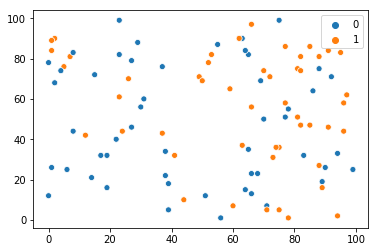

In [133]:
sns.scatterplot(x, y, hue=classes)

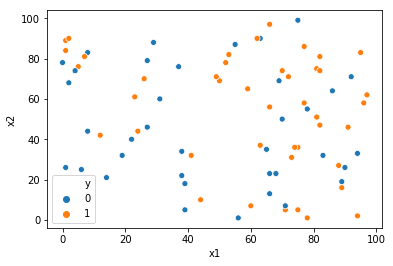

In [134]:
sns.scatterplot(xtrain['x1'], xtrain['x2'], hue=ytrain)

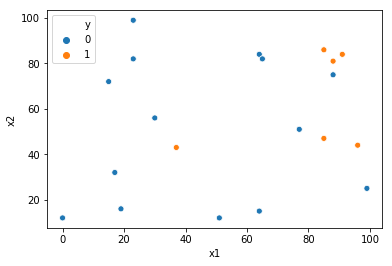

In [135]:
sns.scatterplot(xtest['x1'], xtest['x2'], hue=ytest)

In [230]:
data = pd.read_csv('multiTimeline.csv')

data

,Category: All categories
Week,Common cold: (United States)
2013-12-01,45
2013-12-08,48
2013-12-15,47
2013-12-22,53
2013-12-29,66
2014-01-05,68
2014-01-12,47
2014-01-19,55
2014-01-26,54


In [231]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

C:\Users\Vince\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [234]:
SARIMAX(
    data['Category: All categories'], order=(2,1,0), seasonal_order=(1,0,0,3))

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).